In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import gc

%matplotlib inline

In [2]:
cols = ['MaterialType','CheckoutYear','CheckoutMonth','Checkouts']
pd_chunks = pd.read_csv('Checkouts_by_Title.csv', chunksize=1000000, usecols=cols)

checkout_dfs = []

for chunk in pd_chunks:
    df = pd.DataFrame(chunk)
    checkout_dfs.append(df)

In [3]:
checkouts = pd.concat(checkout_dfs)

In [4]:
del(checkout_dfs)
del(df)
gc.collect()

20

In [58]:
checkouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34892623 entries, 0 to 34892622
Data columns (total 4 columns):
MaterialType     object
CheckoutYear     int64
CheckoutMonth    int64
Checkouts        int64
dtypes: int64(3), object(1)
memory usage: 1.0+ GB


In [9]:
checkouts.MaterialType.value_counts()

BOOK             19594797
EBOOK             4073379
SOUNDDISC         4009527
VIDEODISC         3035380
AUDIOBOOK         1708745
                   ...   
ATLAS, ER               3
NONPROJGRAPH            2
SECTION                 2
MAP, VIEW               1
ER, VIDEOCASS           1
Name: MaterialType, Length: 66, dtype: int64

In [ ]:
filt1 = checkouts.MaterialType == 'BOOK'
filt2 = checkouts.MaterialType == 'EBOOK'
filt3 = checkouts.MaterialType == 'AUDIOBOOK'

df = (checkouts[filt1 | filt2 | filt3]
      .groupby(['CheckoutYear', 'MaterialType'], as_index=False)
      .agg({'Checkouts': 'sum'})
)

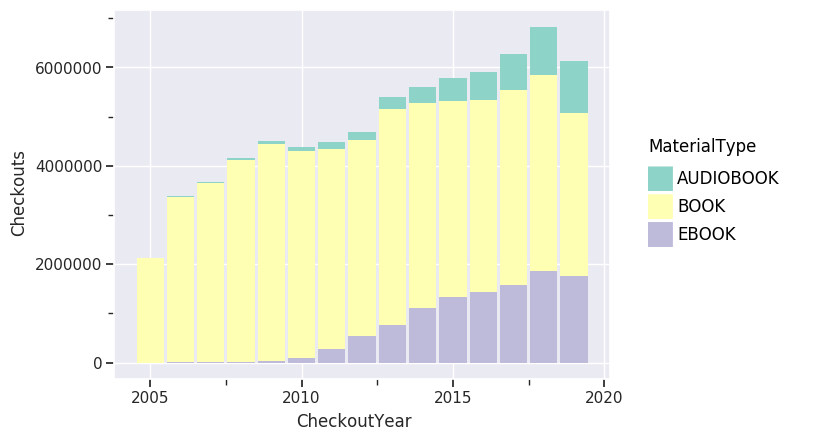

<ggplot: (8787667737301)>

In [33]:
(ggplot(df)
 + aes(x='CheckoutYear', y='Checkouts', fill='MaterialType')
 + geom_bar(stat='identity')
 + theme_seaborn()
 + scale_fill_brewer(type='qual', palette='Set3')
)

In [24]:
df = (checkouts
      .groupby(['CheckoutYear','CheckoutMonth'])
      .agg({'Checkouts': 'sum'})
      .groupby(level=0, group_keys=False)
      .apply(lambda x : (x - x.mean())/x.std())
#       .reset_index()
     )

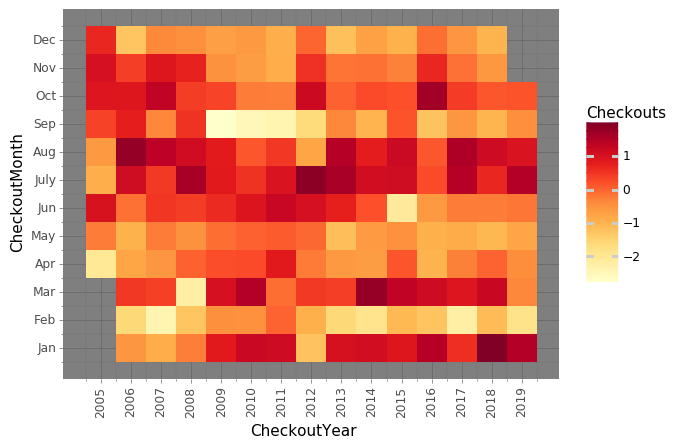

<ggplot: (8727762242297)>

In [18]:
(ggplot(df)
 + aes('CheckoutYear', 'CheckoutMonth', fill='Checkouts')
 + geom_tile()
 + scale_fill_cmap('YlOrRd')
 + theme_dark()
 + scale_y_continuous(breaks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                  'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
 + scale_x_continuous(breaks=range(2005,2020))
 + theme(axis_text_x=element_text(rotation=90))
)

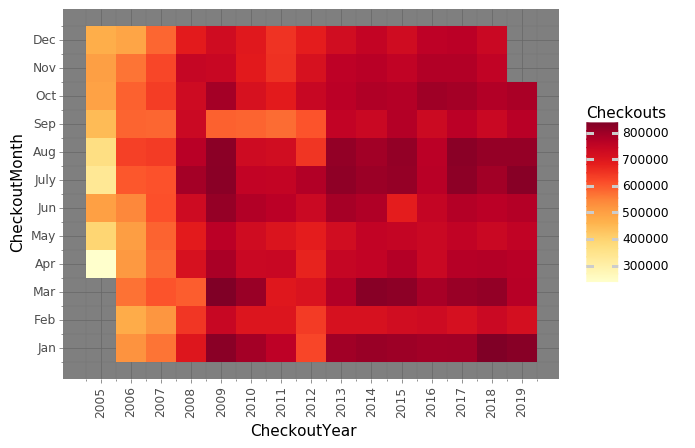

<ggplot: (8752807381977)>

In [22]:
(ggplot(df)
 + aes('CheckoutYear', 'CheckoutMonth', fill='Checkouts')
 + geom_tile()
 + scale_fill_cmap('YlOrRd')
 + theme_dark()
 + scale_y_continuous(breaks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                  'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
 + scale_x_continuous(breaks=range(2005,2020))
 + theme(axis_text_x=element_text(rotation=90))
)

In [5]:
filt1 = checkouts.MaterialType == 'BOOK'
filt2 = checkouts.MaterialType == 'EBOOK'
filt3 = checkouts.MaterialType == 'AUDIOBOOK'

df = (checkouts[filt1 | filt2 | filt3]
      .groupby(['CheckoutMonth', 'MaterialType'], as_index=False)
      .agg({'Checkouts': 'sum'})
     )

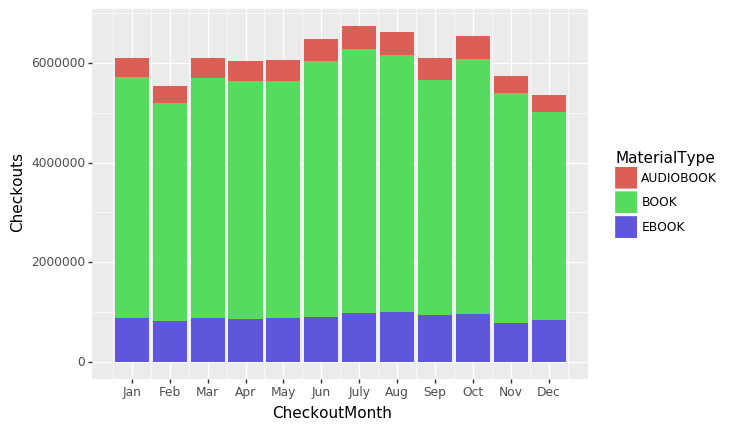

<ggplot: (8752802589261)>

In [29]:
(ggplot(df)
 + aes('CheckoutMonth', 'Checkouts', fill='MaterialType')
 + geom_bar(stat='identity')
 + scale_x_continuous(breaks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                  'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
)

In [6]:
filt1 = checkouts.MaterialType == 'BOOK'
filt2 = checkouts.MaterialType == 'EBOOK'
filt3 = checkouts.MaterialType == 'AUDIOBOOK'

df = (checkouts[filt1 | filt2 | filt3]
      .groupby(['CheckoutMonth', 'MaterialType'], as_index=False)
      .agg({'Checkouts': 'sum'})
     )

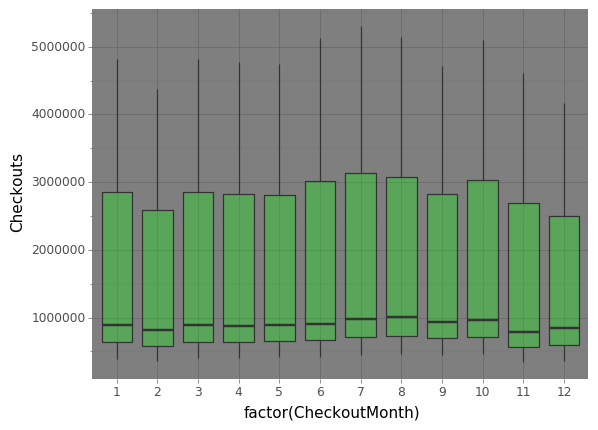

<ggplot: (8740468934537)>

In [44]:
(ggplot(df)
 + aes(x='factor(CheckoutMonth)', y='Checkouts')
 + theme_dark()
 + geom_boxplot(fill="lime", alpha=0.3)
)

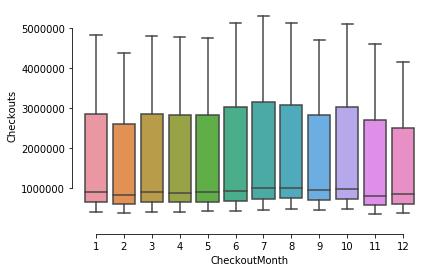

In [22]:
sns.boxplot(x="CheckoutMonth", y="Checkouts",
            data=df)
sns.despine(offset=10, trim=True)

In [9]:
cols = ['MaterialType', 'CheckoutYear','Checkouts', 'Subjects']
pd_chunks = pd.read_csv('Checkouts_by_Title.csv', chunksize=500000, usecols=cols)

checkout_dfs = []

for chunk in pd_chunks:
    df = (pd.DataFrame(chunk)
          .set_index('MaterialType')
          .loc[['BOOK', 'EBOOK', 'AUDIOBOOK'], ['CheckoutYear', 'Checkouts', 'Subjects']]
#           .dropna(subset=['Subjects'])
          .assign(Subjects = lambda x: x.Subjects.str.partition(',')[0])
         )
    
    checkout_dfs.append(df)

In [10]:
checkouts = pd.concat(checkout_dfs)

In [8]:
top_subjs = checkouts.Subjects.value_counts()[:20]

In [11]:
 df = (checkouts
       .groupby('Subjects', as_index = False)
       .agg({'Checkouts': 'sum'})
       .sort_values(by = 'Checkouts', ascending = False)
      )

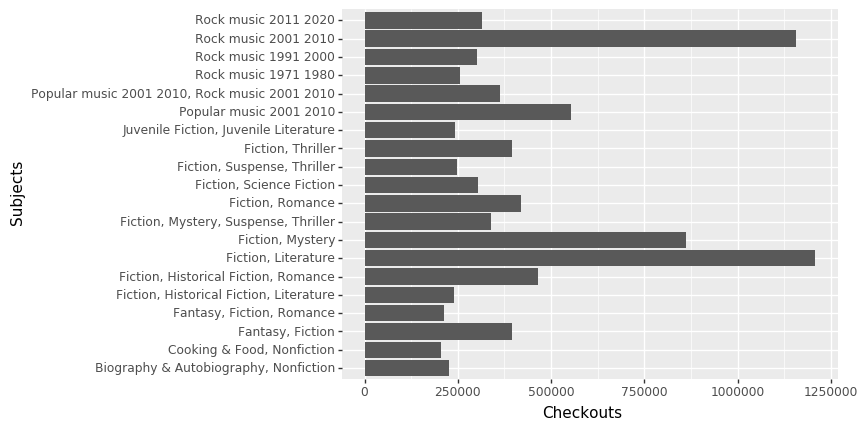

<ggplot: (8748857197617)>

In [14]:
(ggplot(df[:20])
 + aes('Subjects', 'Checkouts')
 + geom_bar(stat='identity')
 + coord_flip()
#  + theme(axis_text = element_text(rotation = 90))
)

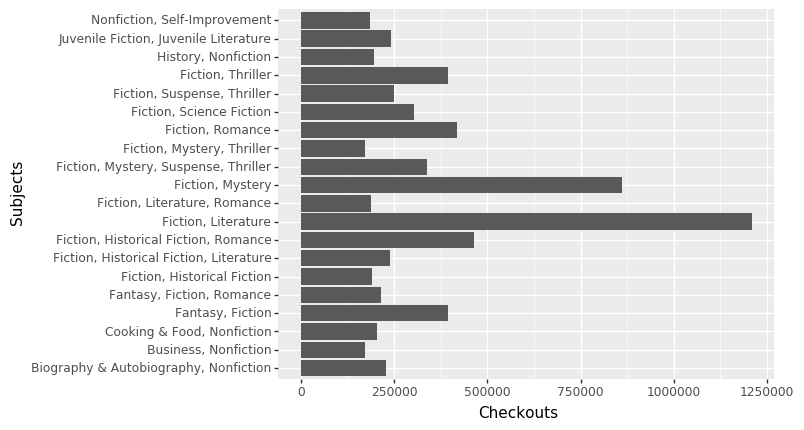

<ggplot: (8762366982737)>

In [12]:
(ggplot(df[:20])
 + aes('Subjects', 'Checkouts')
 + geom_bar(stat='identity')
 + coord_flip()
#  + theme(axis_text = element_text(rotation = 90))
)

In [81]:
gc.collect()

7914

In [8]:
df = (checkouts[ checkouts.Subjects.isin(top_subjs.index)]
      .groupby(['CheckoutYear', 'Subjects'], as_index = False)
      .agg({'Checkouts': 'sum'})
     )

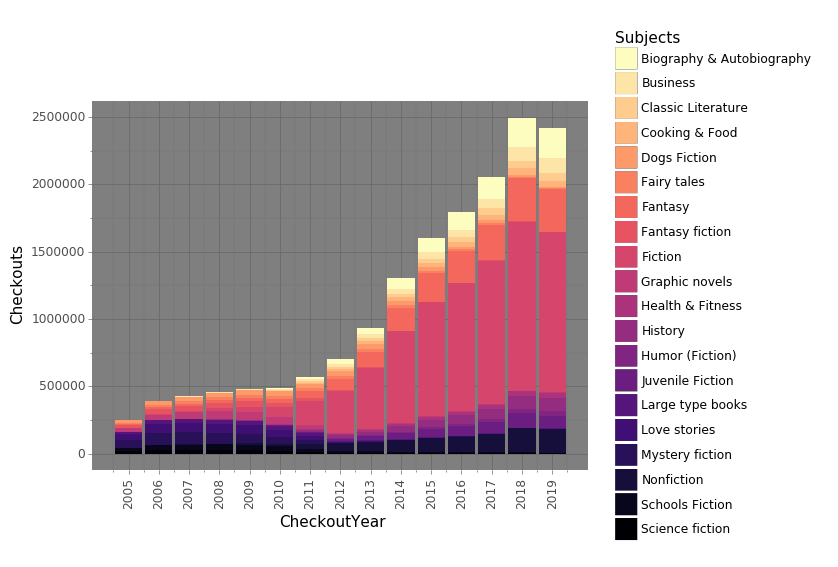

<ggplot: (8726656960729)>

In [9]:
(ggplot(df)
 + aes('CheckoutYear', 'Checkouts', fill='Subjects')
 + geom_bar(stat='identity')
 + theme_dark()
 + scale_fill_cmap_d('magma_r')
 + scale_x_continuous(breaks=range(2005,2020))
 + theme(axis_text_x=element_text(rotation=90))
)

In [121]:
gc.collect()

18439

In [148]:
ggsave(g, width=8, height=8, filename='subjects.png')

/home/rishi/.virtualenvs/pandas/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/rishi/.virtualenvs/pandas/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: subjects.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [4]:
top_subjs = checkouts.Subjects.value_counts()[:20]

In [47]:
def normalized(x):
    var = (x - x.mean())/x.std()
    return var

df = (checkouts[ checkouts.Subjects.isin(top_subjs.index)]
      .groupby(['CheckoutYear', 'Subjects'])
      .agg({'Checkouts': 'sum'})
      .groupby('CheckoutYear')
      .transform(normalized)
      .reset_index()
#       .groupby('CheckoutYear')
#       .transform({'Checkouts':normalized})
     )

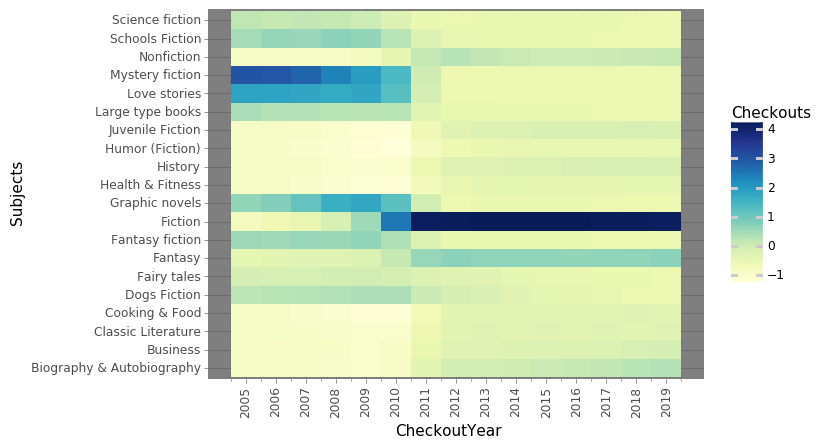

<ggplot: (8726650887297)>

In [54]:
g = (ggplot(df)
 + aes('CheckoutYear', 'Subjects', fill='Checkouts')
 + geom_tile()
 + scale_fill_cmap('YlGnBu')
 + theme_dark()
#  + scale_y_continuous(breaks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
#                                                   'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
 + scale_x_continuous(breaks=range(2005,2020))
 + theme(axis_text_x=element_text(rotation=90))
)
g

In [2]:
cols = ['MaterialType', 'CheckoutMonth', 'CheckoutYear', 'Checkouts', 'Subjects', 'Title', 'Creator']
pd_chunks = pd.read_csv('Checkouts_by_Title.csv', chunksize=500000, usecols=cols)

checkout_dfs = []

for chunk in pd_chunks:
    df = pd.DataFrame(chunk)
    df = df[(df.CheckoutYear == 2018) | (df.CheckoutYear == 2019)]
#     df = (pd.DataFrame(chunk)
#           .set_index('CheckoutYear','MaterialType')
#           .loc[(['2010', '2019'], ['BOOK', 'EBOOK', 'AUDIOBOOK'])]
# #           .dropna(subset=['Subjects'])
#           .assign(Subjects = lambda x: x.Subjects.str.partition(',')[0])
#          )
    
    checkout_dfs.append(df)

In [3]:
checkouts = pd.concat(checkout_dfs)

In [4]:
del(checkout_dfs)
del(df)
gc.collect()

20

In [5]:
checkouts.head()

,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects
14952455,SONG,2018,1,1,Exploding Chimney,The Fall,NaN
14969453,SONG,2018,1,1,"Swing Low, Sweet Chariot",Alex de Grassi,NaN
14969981,SONG,2018,1,1,Fear Not Mary,Will Ackerman;Nick Berry,NaN
14970386,SONG,2018,1,1,Honky Tonk Flame,Tyler Childers,NaN
15021915,AUDIOBOOK,2018,1,1,The Suitors (Unabridged),Cecile David-Weill,"Fiction, Literature"


In [143]:
df_2019 = (checkouts[checkouts.CheckoutYear == 2019]
           .assign(Title = lambda x: x.Title.str.partition('/')[0])
           .set_index('MaterialType')
           .loc[['BOOK', 'EBOOK', 'AUDIOBOOK']]
           .reset_index()
          )

df_2019.Title = (df_2019.Title.str.strip().str.lower().str.partition('a memoir')[0].str.replace(':','')
.str.replace("\(unabridged\)", '').str.strip())

ranked = (df_2019
          .groupby('Title', as_index=False)
          .agg({'Checkouts': 'sum'})
          .set_index('Title')
         )

In [144]:
ranked.nlargest(20, 'Checkouts')

,Checkouts
Title,
becoming,18250
educated,13067
where the crawdads sing,12475
"crazy rich asians crazy rich asians series, book 1",6513
the library book,5937
the life-changing magic of tidying up the japanese art of decluttering and organizing,5000
you are a badass how to stop doubting your greatness and start living an awesome life,3991
little fires everywhere,3830
so you want to talk about race,3693


In [ ]:
checkouts[checkouts.Title.str.lower().str.contains('ready player one')]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import gc

%matplotlib inline

In [3]:
cols = ['MaterialType', 'CheckoutMonth', 'CheckoutYear', 'Checkouts', 'Subjects', 'Title', 'Creator']
pd_chunks = pd.read_csv('Checkouts_by_Title.csv', chunksize=500000, usecols=cols)

checkout_dfs = []

for chunk in pd_chunks:
    df = pd.DataFrame(chunk)
    df = df[df.Title.str.lower().str.contains('ready player one')]
#     df = (pd.DataFrame(chunk)
#           .set_index('CheckoutYear','MaterialType')
#           .loc[(['2010', '2019'], ['BOOK', 'EBOOK', 'AUDIOBOOK'])]
# #           .dropna(subset=['Subjects'])
#           .assign(Subjects = lambda x: x.Subjects.str.partition(',')[0])
#          )
    
    checkout_dfs.append(df)

In [4]:
checkouts = pd.concat(checkout_dfs)

In [37]:
checkouts.Title = (checkouts
                   .Title.str.lower().str.partition('/')[0]
                   .str.partition('(',)[0].str.partition('[')[0]
                   .str.partition(':')[0].str.strip()
                  )

In [97]:
df = (checkouts
      [checkouts.CheckoutYear >= 2013]
      [checkouts.Title.str.match('ready player one')]
      .assign(date =
              lambda x: pd.to_datetime(
                  checkouts.CheckoutYear.astype(str)
                  + '-'
                  + checkouts.CheckoutMonth.astype(str)
              )
             )
      .drop(columns=['Creator', 'Subjects', 'CheckoutYear', 'CheckoutMonth', 'Title'])
      .set_index('MaterialType')
      .loc[['BOOK', 'EBOOK', 'AUDIOBOOK','VIDEODISC']]
      .reset_index()
      .assign(negs = lambda x: x.Checkouts * -1)
      .sort
     )

df.Checkouts = df.Checkouts.ewm(span = 2).mean()
df.negs = df.Checkouts * -1

/home/rishi/.virtualenvs/pandas/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


['#ffffcc', '#a1dab4', '#41b6c4', '#225ea8']


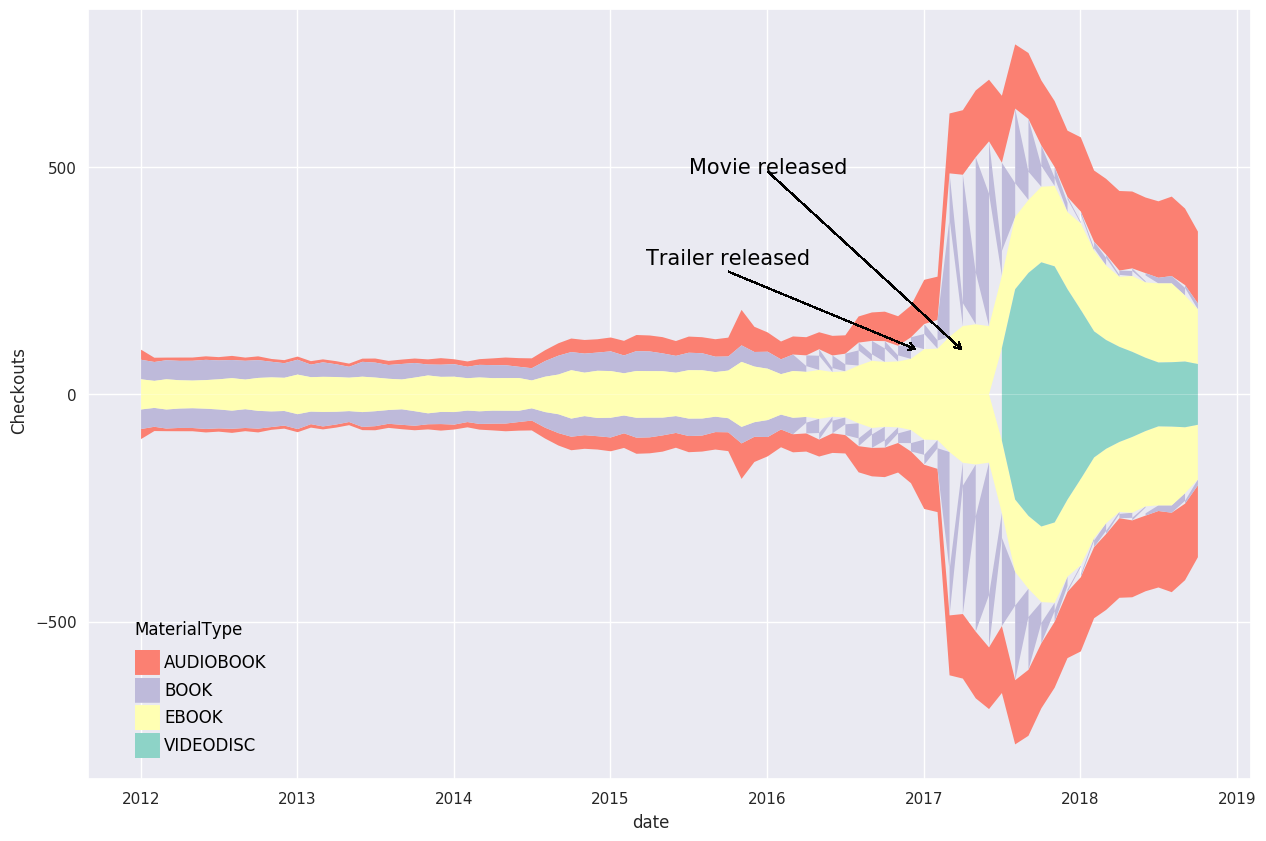

<ggplot: (8786395595993)>

In [117]:
colors = ['#225ea8','#41b6c4','#a1dab4','#ffffcc']
colors2 = ['#fb8072', '#bebada', '#ffffb3', '#8dd3c7']
colors.reverse()
print(colors)
(ggplot(df)
 + aes(x='date', y='Checkouts', fill='MaterialType')
 + geom_area()
 + geom_area(aes('date', 'negs', fill='MaterialType'))
 + theme_seaborn()
  + theme(figure_size=(15,10), axis_ticks=element_blank(),
         legend_position=(0.2, 0.2))
 + scale_fill_manual(values=colors2)
#  + scale_fill_cmap_d('Set1')
 + scale_x_date(breaks=pd.date_range("2011", "2020", freq='A'), labels=list(range(2011,2020)))
 + annotate("text", x=pd.to_datetime('2017-01-01'), y=500,size=15, label="Movie released")
 + geom_segment(aes(x=pd.to_datetime('2018-03-28'), y=100, xend=pd.to_datetime('2017-01-01'), yend=490),arrow=arrow(ends='first',length=0.1))
 + annotate("text", x=pd.to_datetime('2016-10-01'), y=300,size=15, label="Trailer released")
 + geom_segment(aes(x=pd.to_datetime('2017-12-10'), y=100, xend=pd.to_datetime('2016-10-01'), yend=270),arrow=arrow(ends='first',length=0.1))
)